In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats.stats import pearsonr
import os
import matplotlib.ticker as tck
import scipy.stats

error_df_path = 'error_df.csv'

if not os.path.exists(error_df_path):
    exit()

C:\Users\satya\AppData\Local\Temp\ipykernel_16220\3888851783.py:4: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


w1_vec            1.648281
w2_vec            2.493396
w3_vec            2.277608
s4_vec            2.213087
b5_vec            2.257621
callibrate_vec    2.143831
dtype: float64

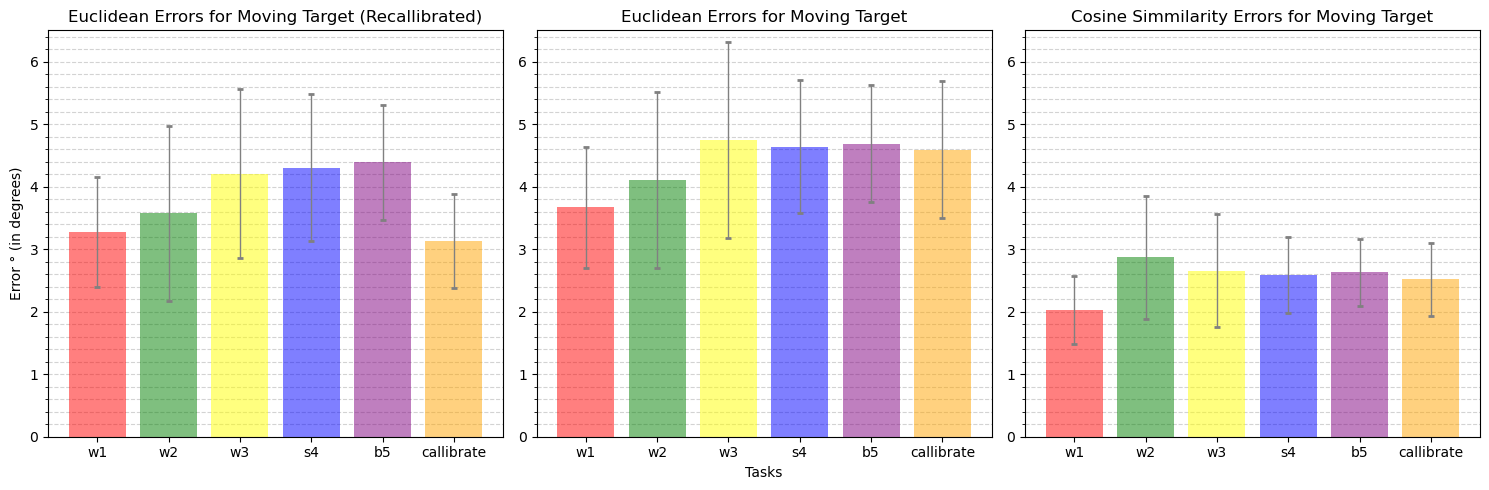

In [61]:
#Plotting means with CI of 95%

df = pd.read_csv(error_df_path, index_col=False)
df['w1_euc'] = df['w1_euc'].apply(lambda p: json.loads(p)[0][0])
df['w2_euc'] = df['w2_euc'].apply(lambda p: json.loads(p)[0][0])
df['w3_euc'] = df['w3_euc'].apply(lambda p: json.loads(p)[0][0])
df['s4_euc'] = df['s4_euc'].apply(lambda p: json.loads(p)[0][0])
df['b5_euc'] = df['b5_euc'].apply(lambda p: json.loads(p)[0][0])
df['callibrate_euc'] = df['callibrate_euc'].apply(lambda p: json.loads(p)[0][0])
df = df[['w1_euc', 'w2_euc', 'w3_euc', 's4_euc', 'b5_euc', 'callibrate_euc']]
y1_std = df.std()/np.sqrt(df.shape[0])*1.96
y1vals = df.mean()+np.abs(df.values.min())
xvals = range(len(df.columns))


df = pd.read_csv(error_df_path, index_col=False)
df['w1_euc'] = df['w1_euc'].apply(lambda p: json.loads(p)[0][1])
df['w2_euc'] = df['w2_euc'].apply(lambda p: json.loads(p)[0][1])
df['w3_euc'] = df['w3_euc'].apply(lambda p: json.loads(p)[0][1])
df['s4_euc'] = df['s4_euc'].apply(lambda p: json.loads(p)[0][1])
df['b5_euc'] = df['b5_euc'].apply(lambda p: json.loads(p)[0][1])
df['callibrate_euc'] = df['callibrate_euc'].apply(lambda p: json.loads(p)[0][1])
df = df[['w1_euc', 'w2_euc', 'w3_euc', 's4_euc', 'b5_euc', 'callibrate_euc']]
y2vals = df.mean()+np.abs(df.values.min())
y2_std = df.std()/np.sqrt(df.shape[0])*1.96


df = pd.read_csv(error_df_path, index_col=False)
df = df[['w1_vec', 'w2_vec', 'w3_vec', 's4_vec', 'b5_vec', 'callibrate_vec']]
y3_std = df.std()/np.sqrt(df.shape[0])*1.96
y3vals = df.mean()+np.abs(df.values.min())


low = min(y1vals)
high = max(y1vals)
labels = [x[:-4] for x in df.columns]
colors=["red", "green", 'yellow', "blue", "purple", 'orange']
titles = ['Euclidean Errors for Moving Target (Recallibrated)', 'Euclidean Errors for Moving Target', 'Cosine Simmilarity Errors for Moving Target']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
axes[0].bar(xvals, y1vals, yerr=y1_std, align='center', alpha=0.5, color=colors, error_kw=dict(ecolor='gray', lw=1, capsize=2, capthick=2))
axes[1].bar(xvals, y2vals, yerr=y2_std, align='center', alpha=0.5, color=colors, error_kw=dict(ecolor='gray', lw=1, capsize=2, capthick=2))
axes[2].bar(xvals, y3vals, yerr=y3_std, align='center', alpha=0.5, color=colors, error_kw=dict(ecolor='gray', lw=1, capsize=2, capthick=2))
axes[0].set_ylabel('Error ° (in degrees)')
axes[1].set_xlabel('Tasks')

for index,ax in  enumerate(axes):
    ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
    ax.yaxis.grid(color='lightgray', which='both', linestyle='dashed') 
    ax.set_axisbelow(True)
    plt.sca(ax)
    plt.xticks(range(len(df.columns)), labels)
    plt.title(titles[index])
    plt.ylim([0, 6.5])
    plt.axhline(y=100, zorder=0)


fig.tight_layout()   
df.mean()

w1_index             46.551724
w2_index             60.919540
w3_index            107.471264
s4_index            131.609195
b5_index            204.597701
callibrate_index     82.183908
dtype: float64

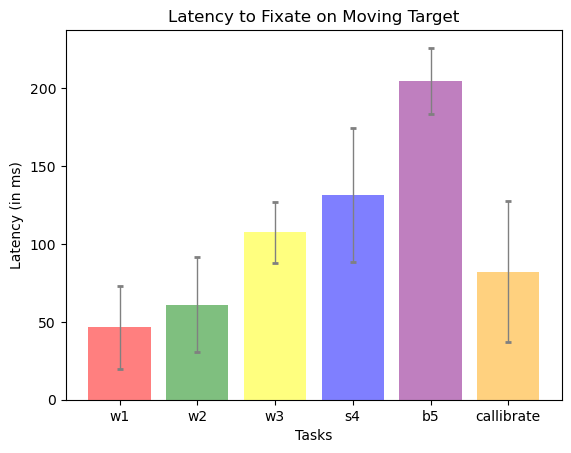

In [62]:
df = pd.read_csv(error_df_path, index_col=False)
df['w1_index'] = df['w1_index'].apply(lambda p: p*1000/60)
df['w2_index'] = df['w2_index'].apply(lambda p: p*1000/60)
df['w3_index'] = df['w3_index'].apply(lambda p: p*1000/60)
df['s4_index'] = df['s4_index'].apply(lambda p: p*1000/60)
df['b5_index'] = df['b5_index'].apply(lambda p: p*1000/60)
df['callibrate_index'] = df['callibrate_index'].apply(lambda p: p*1000/60)
df = df[['w1_index', 'w2_index', 'w3_index', 's4_index', 'b5_index', 'callibrate_index']]
y_std = df.std()/np.sqrt(df.shape[0])*1.96
xvals = range(len(df.columns))
yvals = df.mean()+np.abs(df.values.min())
colors=["red", "green", 'yellow', "blue", "purple", 'orange']
labels = [x[:-6] for x in df.columns]

plt.bar(xvals, yvals, yerr=y_std, align='center', alpha=0.5, color=colors, error_kw=dict(ecolor='gray', lw=1, capsize=2, capthick=2))
plt.xticks(range(len(df.columns)), labels)
plt.ylabel('Latency (in ms)')
plt.xlabel('Tasks')
plt.title('Latency to Fixate on Moving Target')

df.mean()

[7.125283493897241e-34, 4.665840589097598e-21]

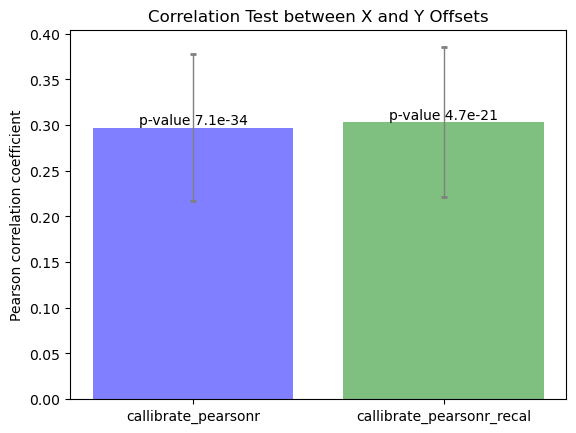

In [63]:
df = pd.read_csv(error_df_path, index_col=False)

cases_with_lower_coeff = 0
cases_with_high_coeff_and_low_p = 0

for index, row in df.iterrows():
    r = [json.loads(row['callibrate_pearsonr']), json.loads(row['callibrate_pearsonr_recal'])]

    if abs(r[0][0]) > abs(r[1][0]):
        cases_with_lower_coeff+=1
    elif r[1][1] < 0.05 and abs(r[1][0]) > 0.5:
        cases_with_high_coeff_and_low_p+=1

cases_with_lower_coeff = cases_with_lower_coeff/ len(df.index)
cases_with_high_coeff_and_low_p = cases_with_high_coeff_and_low_p/ len(df.index)
p = df['callibrate_pearsonr'].apply(lambda p: abs(json.loads(p)[1]))
p_recal = df['callibrate_pearsonr_recal'].apply(lambda p: abs(json.loads(p)[1]))

df['callibrate_pearsonr'] = df['callibrate_pearsonr'].apply(lambda p: abs(json.loads(p)[0]))
df['callibrate_pearsonr_recal'] = df['callibrate_pearsonr_recal'].apply(lambda p: abs(json.loads(p)[0]))
df = df[['callibrate_pearsonr', 'callibrate_pearsonr_recal']]

y_std = df.std()/np.sqrt(df.shape[0])*1.96
xvals = range(len(df.columns))
yvals = df.mean()+np.abs(df.values.min())

bar1 = plt.bar(xvals, yvals, yerr=y_std, align='center', alpha=0.5, color = ['blue','green'], error_kw=dict(ecolor='gray', lw=1, capsize=2, capthick=2))
plt.xticks(range(len(df.columns)),  df.columns)
plt.ylabel('Pearson correlation coefficient')
plt.title('Correlation Test between X and Y Offsets')

pears = [p.median(),p_recal.median()]

for i,rect in enumerate(bar1):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, 'p-value '+f'{pears[i]:.1e}', ha='center', va='bottom')


pears

# y = [4, 9, 2]
# z = [1, 2, 3]
# ax = plt.subplot(11)
# ax.bar(x-0.2, y, width=0.2, color='b', align='center')
# ax.bar(x, z, width=0.2, color='g', align='center')
# ax.xaxis_date()
# plt.show()

In [64]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

precision_df_path = 'precision_df.csv'
if not os.path.exists(precision_df_path):
    exit()

df = pd.read_csv(precision_df_path, index_col=False)
df['ISI'] = df['ISI'].apply(lambda p: p*1000)
# df['precision'] = df['callibrate_pearsonr_recal'].apply(lambda p: abs(json.loads(p)[0]))

isi = mean_confidence_interval(df['ISI'])
precision = mean_confidence_interval(df['precision'])
